# <center> Laboratorium: Klasyfikacja i regresja w Keras </center>

### 1. Zakres ćwiczeń
- Przypomnienie zasad budowy prostych sieci neuronowych dla klasyfikacji oraz regresji.
- Budowanie sieci przy pomocy API Sequential Keras.
- Zbieranie danych procesu uczenia i jego wizualizacja przy pomocy TensorBoard.
- Korzystanie z mechanizmu early stopping do zatrzymania procesu uczenia w odpowiednim
czasie.

### 2. Zadania
##### 2.1 Klasyfikacja obrazów
- Pobierz zbiór danych _Fashion MNIST_.

In [1]:
%load_ext tensorboard

In [2]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

- Przeskaluj wartości z zakresu 0–255 do zakresu 0–1.

In [4]:
X_train = X_train/255
X_test = X_test/255

- Wyświetl przykładowy rysunek używany do klasyfikacji:

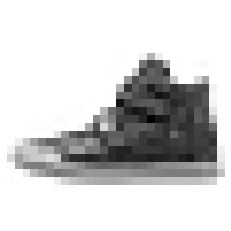

In [5]:
plt.imshow(X_train[142], cmap="binary")
plt.axis('off')
plt.show()

- Utwórz listę nazw kategorii zgodnie ze specyfikacją zbioru danych:

In [6]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
"sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[142]]

'but'

- Stwórz model sekwencyjny zawierający warstwy gęste:
    • warstwę spłaszczającą dane, tj. przekształcającą z postaci (28,28) do postaci (784,),
    • warstwę ukrytą zawierającą 300 neuronów,
    • warstwę ukrytą zawierającą 100 neuronów,
    • warstwę wyjściową odpowiednią dla problemu klasyfikacji przy 10 klasach.

In [7]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

- Wyświetl podsumowanie i graficzną reprezentację struktury sieci.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


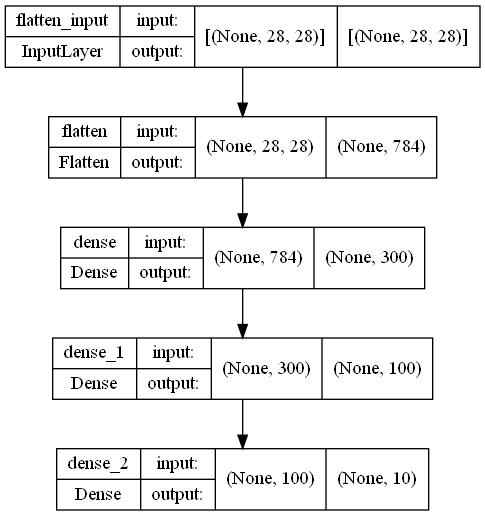

In [8]:
model.summary()
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

- Skompiluj model, podając rzadką entropię krzyżową jako funkcję straty, SGD jako opymalizator i
dokładność jako metrykę

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              metrics='accuracy')

- Przygotuj callback Tensorboard do zbierania historii uczenia w katalogu image_logs, będącym
podkatalogim bieżącego katalogu. Można do tego użyć takiej funkcji jak poniżej, która przy każdym
wywołaniu będzie zwracała nowy katalog o nazwie opartej o aktualny czas. Alternatywnie możesz
nazywać katalogi np. oznaczając w nazwie informacje o strukturze sieci. Pamiętaj, że TensorBoard
zawsze szuka w podanym katalogu podkatalogów odpowiadających kolejnym procesom uczenia
sieci.

In [10]:
root_logdir = os.path.join(os.curdir, "image_logs")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

- Przyucz model przez 20 epok. Wykorzystaj 10% zbioru uczącego jako zbioru walidacyjnego – zwróć
uwagę, że nie został on wcześniej wydzielony ręcznie. Pamiętaj o dołączeniu callbacku TensorBoard.

In [11]:
history = model.fit(X_train, y_train, epochs=20,
    validation_split = 0.1, callbacks=[tensorboard_cb])

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5345 - accuracy: 0.8049 - val_loss: 0.5119 - val_accuracy: 0.7935
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3885 - accuracy: 0.8576 - val_loss: 0.4210 - val_accuracy: 0.8432
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3462 - accuracy: 0.8721 - val_loss: 0.3635 - val_accuracy: 0.8652
Epoch 4/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3223 - accuracy: 0.8809 - val_loss: 0.4307 - val_accuracy: 0.8480
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3039 - accuracy: 0.8861 - val_loss: 0.3316 - val_accuracy: 0.8785
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2872 - accuracy: 0.8916 - val_loss: 0.4292 - val_accuracy: 0.8488
Epoch 7/20
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2739 - accuracy: 0.8969 - val_loss: 0.3235 - val_accuracy:

- Wykonaj kilka przykładowych predykcji dla losowych elementów zbioru testowego. Czy podpisy
odpowiadają zawartości obrazków?

Prediction: kurtka
Confidence: 0.50711644
Truth: pulower


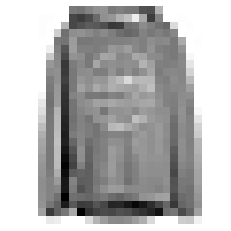

In [12]:
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

- Przeanalizuj proces uczenia uruchamiając TensorBoard

In [13]:
# %tensorboard --logdir ./image_logs

- Zapisz model w pliku fashion_clf.h5:

In [14]:
model.save('fashion_clf.h5')

#### _2.2 Regresja_
- Pobierz zbiór danych California Housing z pakietu scikit-learn:

In [15]:
housing = fetch_california_housing()

- Podziel zbiór na uczący, walidacyjny i testowy. Zauważ, że tym razem wydzielamy zbiór walidacyjny
_explicite_ i nie będziemy korzystali z argumentu **validation_split** metody **fit**.

In [16]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

- Przeskaluj wszystkie zbiory cech, kalibrując funkcję normalizacyjną do zbioru uczącego:

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

- Utwórz model, zawierający jedną warstwę ukrytą z 30 neuronami, odpowiedni do regresji jednego parametru wyjściowego obecnego w zbiorze danych.
- Skompiluj go używając błędu średniokwadratwego jako funkcji straty i SGD jako optymalizatora.

In [18]:
modelReg = keras.models.Sequential()

modelReg.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
modelReg.add(keras.layers.Dense(1))

In [19]:
modelReg.compile(loss="mean_squared_error", optimizer='sgd')

- Przygotuj callback _early stopping_ o cierpliwości równej 5 epok, minimalnej wartości poprawy
wynoszącej 0.01 i włączając wyświetlanie komunikatów o przerwaniu uczenia na ekranie:

In [20]:
es = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

- Podobnie jak w poprzednim ćwiczeniu, przygotuj callback Tensorboard, tak aby zbierał logi do
katalogu **housing_logs**.

In [21]:
root_logdir_ = os.path.join(os.curdir, "housing_logs")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir_, run_id)
run_logdir_ = get_run_logdir()
tensorboard_cb_ = tf.keras.callbacks.TensorBoard(run_logdir_)

- Przeprowadź uczenie modelu korzystając z obu callbacków (_early stopping_ i TensorBoard). Jaką
liczbę epok uczenia należy podać w tym przypadku?

In [22]:
historyReg1 = modelReg.fit(X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid), callbacks=[es, tensorboard_cb_])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8523 - val_loss: 9.5313
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5781 - val_loss: 3.9602
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4638 - val_loss: 0.4002
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4292 - val_loss: 0.3844
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4141 - val_loss: 0.3723
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4037 - val_loss: 0.3866
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3994 - val_loss: 0.3899
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3905 - val_loss: 0.3962
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3857 - val_loss: 0.3929
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3806 - val_loss: 0.4059

- Zapisz model w pliku reg_housing_1.h5.

In [23]:
modelReg.save('reg_housing_1.h5')

- Utwórz jeszcze co najmniej dwa modele o innej strukturze – poeksperymentuj z liczbą warstw oraz
liczbą jednostek na jednej warstwie. Zapisz je w plikach reg_housing_2.h5, reg_housing_3.h5,
itd.
- Zapisuj logi TensorBoard w kolejnych podkatalogach katalogu housing_logs.

In [24]:
modelReg2 = keras.models.Sequential()

modelReg2.add(keras.layers.Dense(50, activation="relu", input_shape=X_train.shape[1:]))
modelReg2.add(keras.layers.Dense(20, activation="tanh"))
modelReg2.add(keras.layers.Dense(10, activation="relu"))
modelReg2.add(keras.layers.Dense(1))

In [25]:
modelReg2.compile(loss="mean_squared_error", optimizer='sgd')

In [26]:
run_logdir_ = get_run_logdir()
tensorboard_cb_ = tf.keras.callbacks.TensorBoard(run_logdir_)

In [27]:
historyReg2 = modelReg2.fit(X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid), callbacks=[es, tensorboard_cb_])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5861 - val_loss: 0.3875
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3898 - val_loss: 0.3440
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3660 - val_loss: 0.3386
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3531 - val_loss: 0.3279
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3462 - val_loss: 0.3273
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3406 - val_loss: 0.3177
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3359 - val_loss: 0.3159
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3317 - val_loss: 0.3161
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3268 - val_loss: 0.3218
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3253 - val_loss: 0.3131

In [28]:
modelReg2.save('reg_housing_2.h5')

In [29]:
modelReg3 = keras.models.Sequential()

modelReg3.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
modelReg3.add(keras.layers.Dense(10, activation="sigmoid"))
modelReg3.add(keras.layers.Dense(1))

In [30]:
modelReg3.compile(loss="mean_squared_error", optimizer='sgd')

In [31]:
run_logdir_ = get_run_logdir()
tensorboard_cb_ = tf.keras.callbacks.TensorBoard(run_logdir_)

In [32]:
historyReg3 = modelReg3.fit(X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid), callbacks=[es, tensorboard_cb_])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8733 - val_loss: 0.5357
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5261 - val_loss: 0.4533
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4644 - val_loss: 0.4082
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4278 - val_loss: 0.3826
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4060 - val_loss: 0.3695
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3944 - val_loss: 0.3580
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3853 - val_loss: 0.3534
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3787 - val_loss: 0.3479
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3735 - val_loss: 0.3463
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3690 - val_loss: 0.3430

In [33]:
modelReg3.save('reg_housing_3.h5')